In [1003]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iriscsv/Iris.csv


In [1038]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1051]:
df = pd.read_csv("//kaggle/input/iriscsv/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [1006]:
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [1052]:

if "Id" in df.columns:
    df = df.drop("Id", axis='columns')
else:
    print("Column 'Id' not found.")

In [1088]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


stats abt data 


In [1087]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,0.980000
std,0.828066,0.433594,1.764420,0.763161,0.831187
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


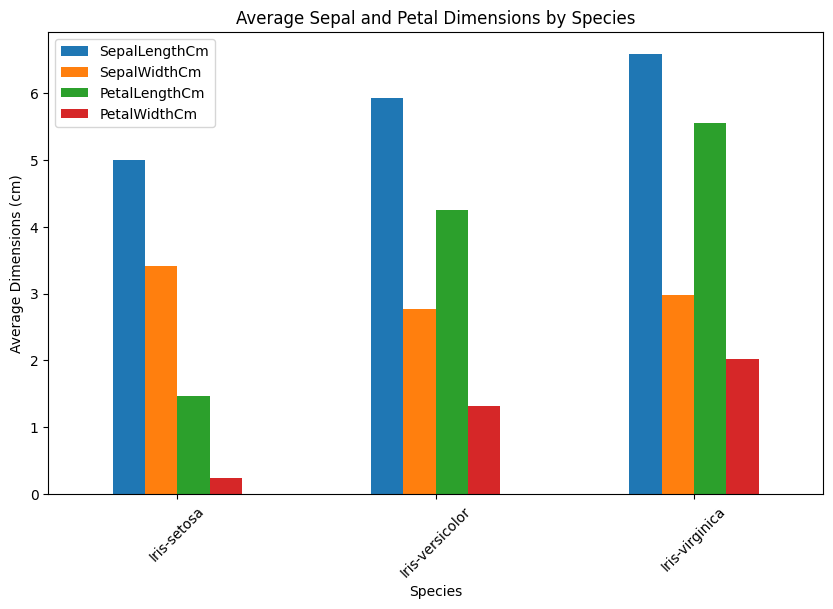

In [1055]:

import pandas as pd
import matplotlib.pyplot as plt

# Group by species and calculate mean for each feature
grouped_df = df.groupby('Species').mean()

# Plot the average value of each feature for each species
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sepal and Petal Dimensions by Species')
plt.xlabel('Species')
plt.ylabel('Average Dimensions (cm)')
plt.xticks(rotation=45)
plt.show()


Sepal dimensions appear less discriminative compared to petal dimensions, though slight variations exist.

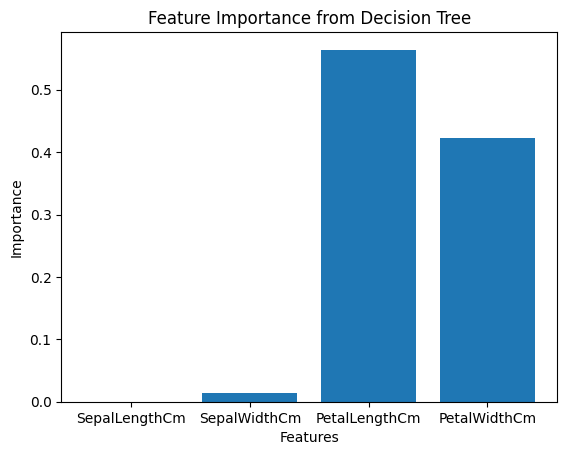

In [1056]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Train a Decision Tree classifier
model = DecisionTreeClassifier()
X = df.drop(columns='Species')  # features
y = df['Species']  # target variable
model.fit(X, y)

# Get feature importances
feature_importance = model.feature_importances_

# Create a bar plot for feature importance
plt.bar(X.columns, feature_importance)
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

Petal Length (PetalLengthCm) is the most important feature

Text(0.5, 1.0, 'Sepal Length by Species')

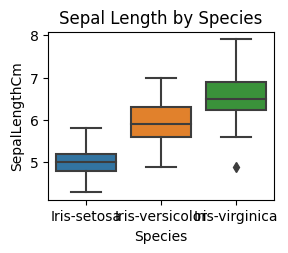

In [1057]:
plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Sepal Length by Species')

Text(0.5, 1.0, 'Sepal Width by Species')

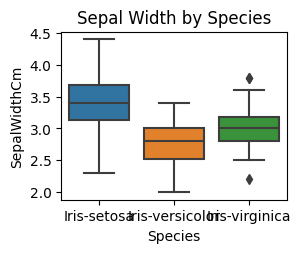

In [1058]:
plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.title('Sepal Width by Species')


Text(0.5, 1.0, 'Petal Length by Species')

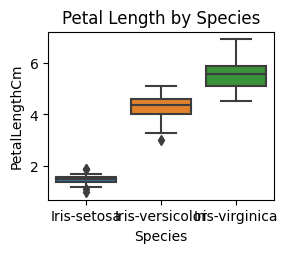

In [1059]:
plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Petal Length by Species')

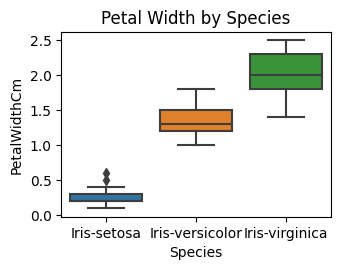

In [1060]:
plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.title('Petal Width by Species')

plt.tight_layout()
plt.show()

In [1086]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Cluster        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


display no of samples on each class

In [1062]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

cleaning dataset
chcek numm

In [1063]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

create hist fr each coloumn

<Axes: >

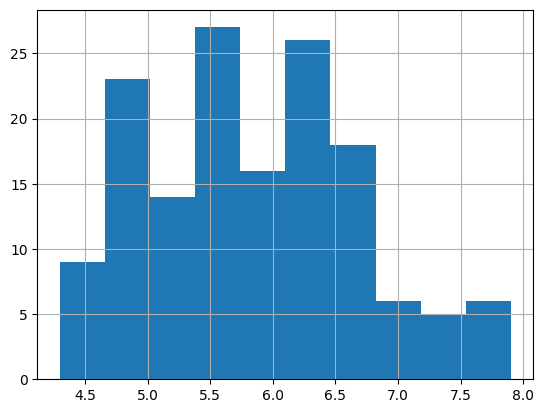

In [1064]:
df['SepalLengthCm'].hist()


normal distrubution

<Axes: >

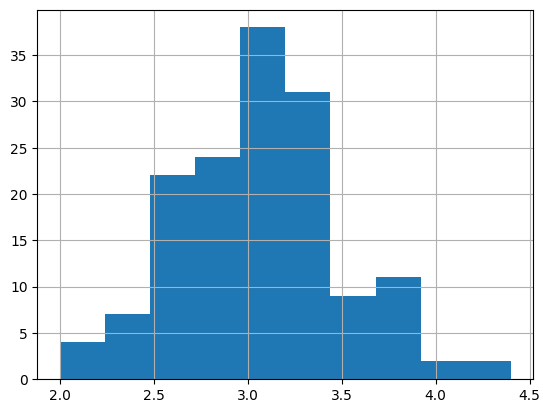

In [1065]:
df["SepalWidthCm"].hist()

(normal distrubution )quicly learn dtaa

<Axes: >

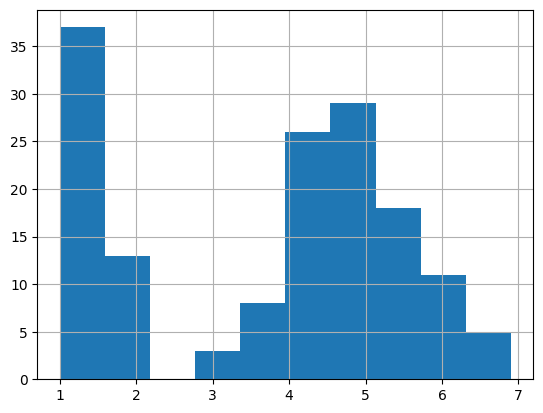

In [1066]:
df['PetalLengthCm'].hist()

(2 clases)

<Axes: >

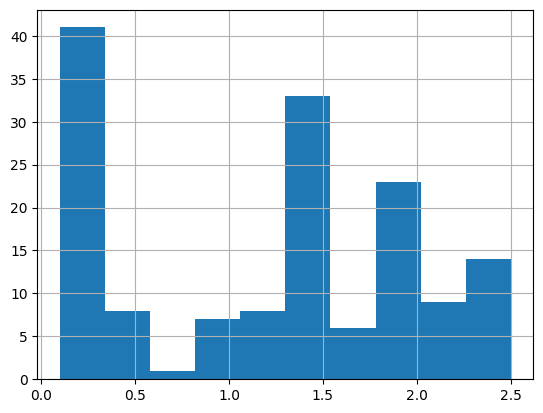

In [1067]:
df['PetalWidthCm'].hist()

(2 clasees)

scatter plot visualisation

In [1068]:
colors= ['red','orange','blue','yellow']
Species=['Iris-setosa','Iris-versicolor','Iris-virginica']

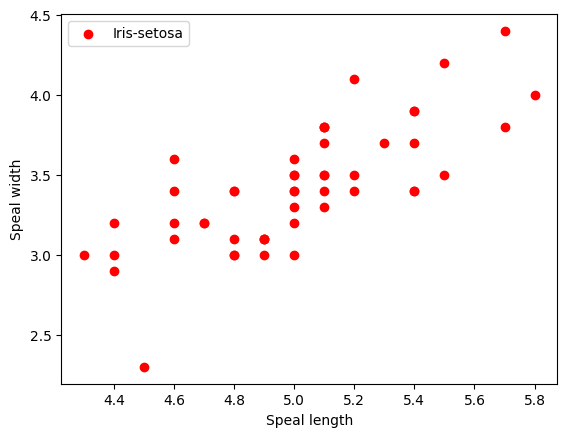

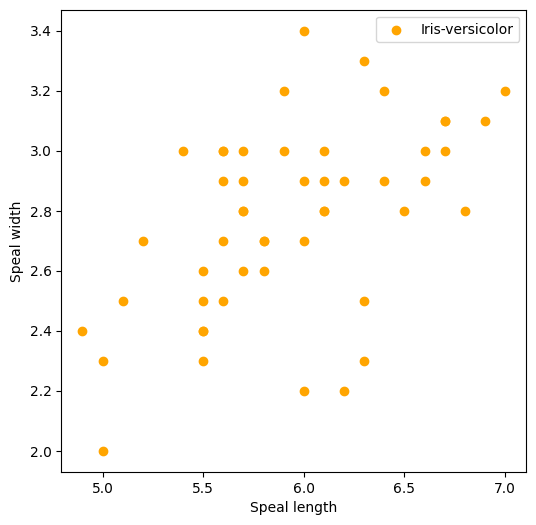

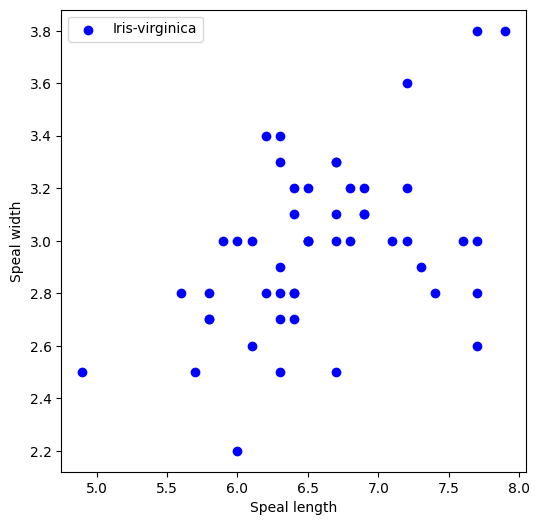

<Figure size 600x600 with 0 Axes>

In [1069]:

for i in range(3):

    x=df[df['Species']==Species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'],c =colors[i], label=Species[i])
  
    plt.xlabel('Speal length')
    plt.ylabel('Speal width')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(6,6))

here v get 3 grpah for each class of species as show()+figsize() is given inside for loop

to crete on same graph - bring 2 fun out the loop


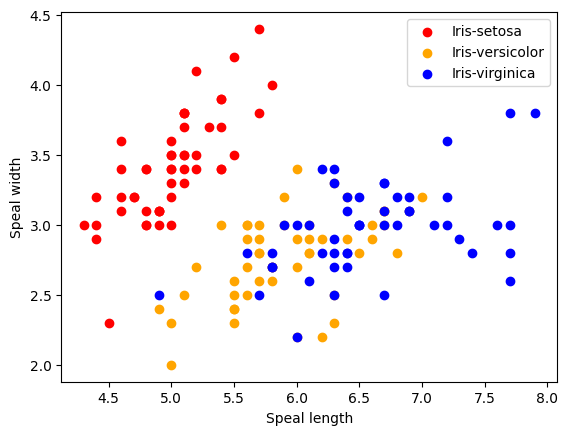

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [1070]:
for i in range(3):

    x=df[df['Species']==Species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'],c =colors[i], label=Species[i])
  
    plt.xlabel('Speal length')
    plt.ylabel('Speal width')
    plt.legend()
plt.show()
    
plt.figure(figsize=(6,6))
 

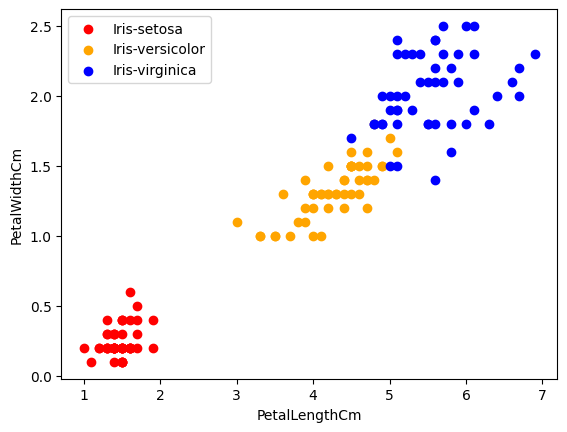

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [1071]:
for i in range(3):

    x=df[df['Species']==Species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'],c =colors[i], label=Species[i])
  
    plt.xlabel('PetalLengthCm')
    plt.ylabel('PetalWidthCm')
    plt.legend()
plt.show()
    
plt.figure(figsize=(6,6))

now u see - 1 clas is spearated(red), and few overlapped(yello+blue)

now next combination

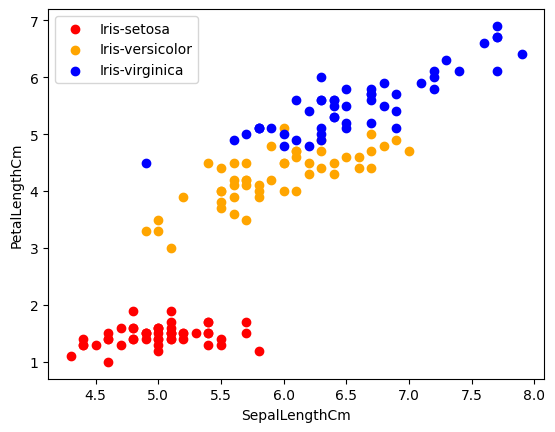

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [1027]:
for i in range(3):

    x=df[df['Species']==Species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'],c =colors[i], label=Species[i])
  
    plt.xlabel('SepalLengthCm')
    plt.ylabel('PetalLengthCm')
    plt.legend()
plt.show()
    
plt.figure(figsize=(6,6))

its seen same - over combination od length of petal n speal- 

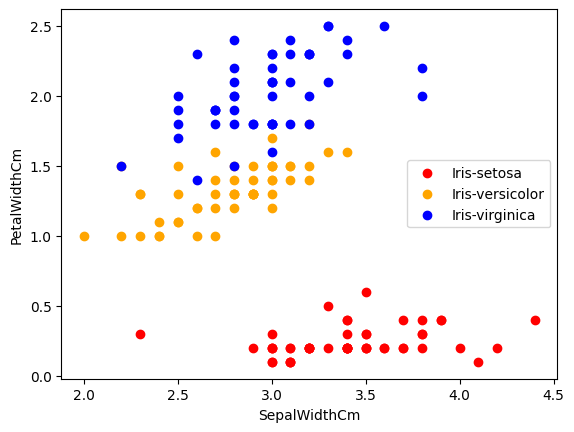

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [1072]:
for i in range(3):

    x=df[df['Species']==Species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'],c =colors[i], label=Species[i])
  
    plt.xlabel('SepalWidthCm')
    plt.ylabel('PetalWidthCm')
    plt.legend()
plt.show()
    
plt.figure(figsize=(6,6))

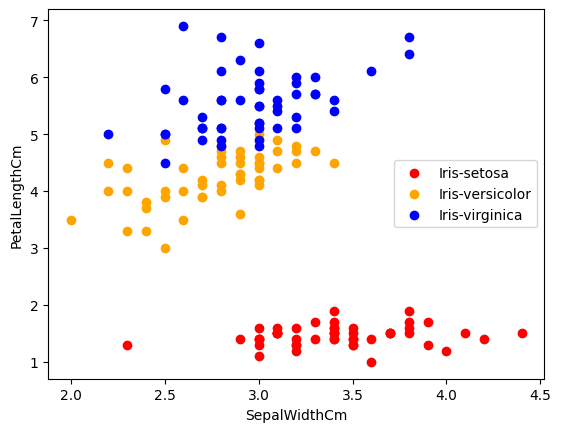

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [1073]:
for i in range(3):

    x=df[df['Species']==Species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalLengthCm'],c =colors[i], label=Species[i])
  
    plt.xlabel('SepalWidthCm')
    plt.ylabel('PetalLengthCm')
    plt.legend()
plt.show()
    
plt.figure(figsize=(6,6))

pair plot

Text(5.5, 4, 'Interesting Point')

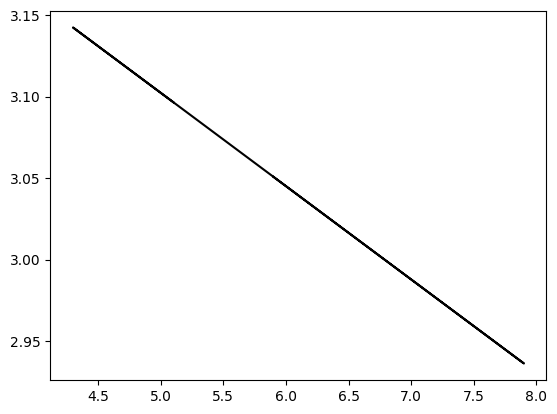

In [1074]:
import numpy as np
from scipy.stats import linregress

x = df['SepalLengthCm']
y = df['SepalWidthCm']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, slope * x + intercept, color='black', label='Trendline')
plt.annotate("Interesting Point", xy=(5.1, 3.5), xytext=(5.5, 4),
             arrowprops=dict(facecolor='black', shrink=0.05))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


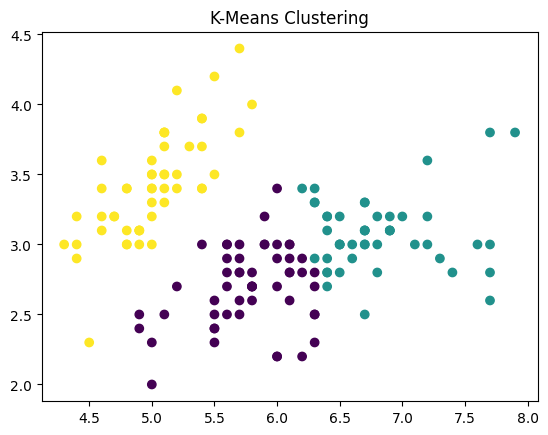

In [1092]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['SepalLengthCm', 'SepalWidthCm']])
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Cluster'], cmap='viridis')
plt.title("K-Means Clustering")
plt.show()
df.rename(columns={'cluster': 'Species'}, inplace=True)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

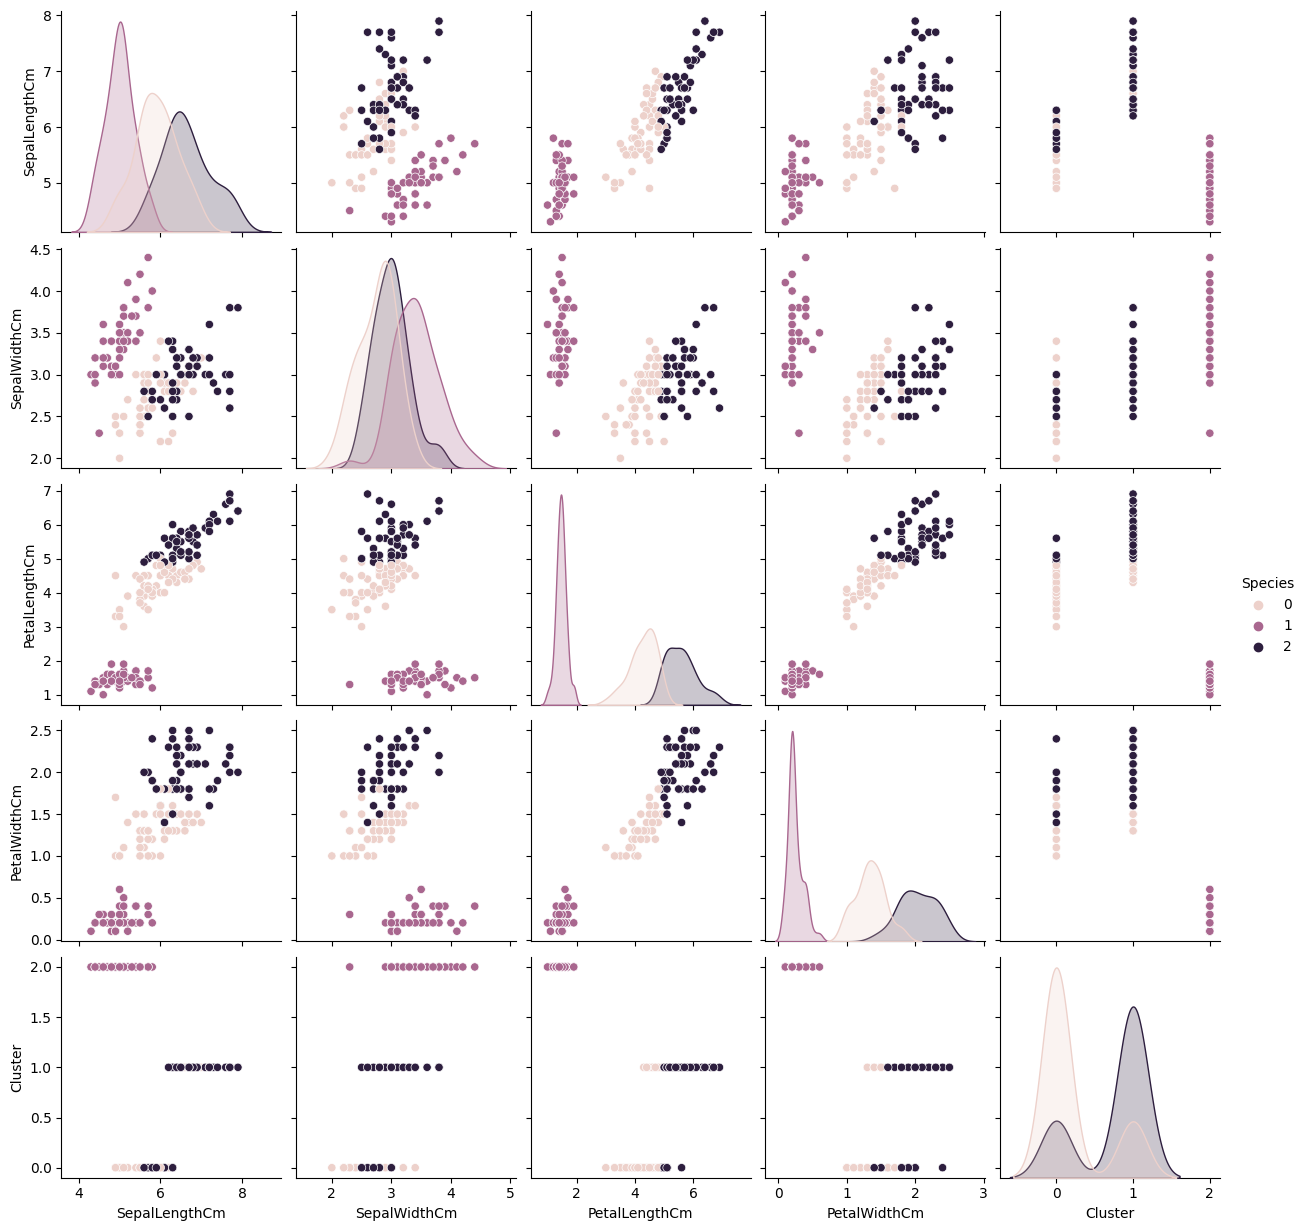

In [1113]:
import seaborn as sns
sns.pairplot(df, hue='Species')
plt.show()

There seems to be a positive correlation between petal length and petal width, suggesting that as petal length increases, petal width also tends to increase.

In [1112]:
from scipy.stats import ttest_ind

setosa = df[df['Species'] == 'Setosa']['SepalLengthCm']
versicolor = df[df['Species'] == 'Versicolor']['SepalLengthCm']
t_stat, p_val = ttest_ind(setosa, versicolor)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: nan, P-value: nan


/tmp/ipykernel_30/3776750653.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_val = ttest_ind(setosa, versicolor)


corelatin matricx---highter CR=1-->+ linear r
                    Lowe   CR=-1-->- linear r

In [1035]:
df.corr()

ValueError: could not convert string to float: 'Iris-setosa'

now have to convert categorical to numeric 

dropdown the caterigoral values to numerical for correlation cal -
for which use datypes b4


In [1093]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Cluster', 'Species'],
      dtype='object')

In [1094]:
df = df.select_dtypes(include=['number'])


correlation_matrix = df.corr()
print(correlation_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954   
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544   
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757   
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000   
Cluster            -0.372196      0.695763      -0.676484     -0.636978   
Species             0.348167      0.242274       0.286327      0.352230   

                Cluster   Species  
SepalLengthCm -0.372196  0.348167  
SepalWidthCm   0.695763  0.242274  
PetalLengthCm -0.676484  0.286327  
PetalWidthCm  -0.636978  0.352230  
Cluster        1.000000  0.285192  
Species        0.285192  1.000000  


in map fromate

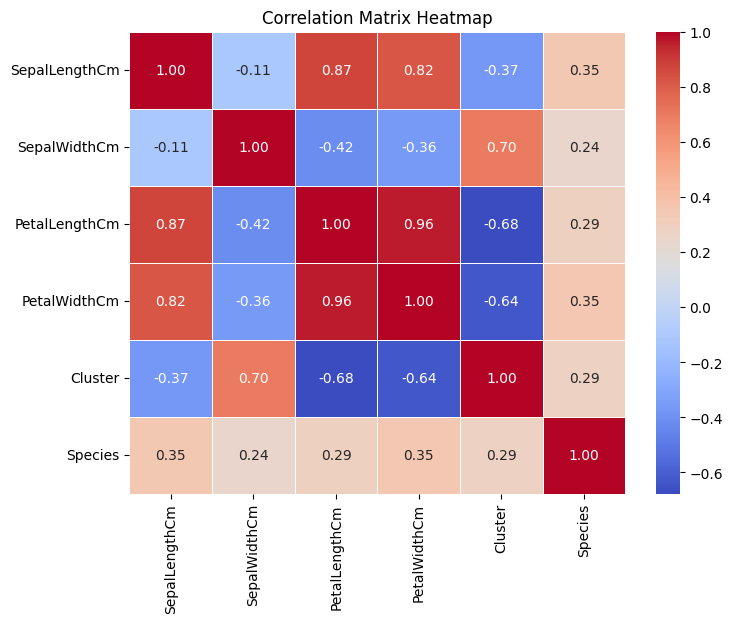

In [1095]:


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

imp btw variable -- to neglate  higher corr whn v have 100s of values
currently 4 so no need to neglate

Petal Length and Petal Width: These two features exhibit a strong positive correlation (0.96). This indicates that as petal length increases, petal width also tends to increase.
Sepal Length and Petal Length: There's a moderate positive correlation (0.87) between these two features, suggesting that larger flowers tend to have longer sepals.
Sepal Length and Petal Width: Similarly, there's a moderate positive correlation (0.82) between sepal length and petal width.

Sepal Width and Petal Length/Petal Width: There's a weak negative correlation between sepal width and both petal length and petal width. This suggests that as sepal width increases, petal length and width tend to decrease slightly.

In [1081]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Cluster'],
      dtype='object')

In [1096]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
print(df.head())
print(df['Species'].unique())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Cluster  Species
0            5.1           3.5            1.4           0.2        2        1
1            4.9           3.0            1.4           0.2        2        1
2            4.7           3.2            1.3           0.2        2        1
3            4.6           3.1            1.5           0.2        2        1
4            5.0           3.6            1.4           0.2        2        1
[1 0 2]


all analysis is dn  - v need to train model

v need train data n test data - validate

In [1097]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Species']) 
y = df['Species'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 5) (30, 5) (120,) (30,)


classificatioin model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 
model.fit(X_train, y_train)

In [1111]:
print("Accuracy:", model.score(X_test, y_test) * 100)

Accuracy: 100.0


got high accuracy 
lets try diff accuracy

In [1110]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)  # You can change n_neighbors to a different value
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [1109]:
print("Accuracy:", model.score(X_test, y_test) * 100)

Accuracy: 100.0


high accuracy

In [1100]:
from sklearn.model_selection import cross_val_score

# Cross-validation with RandomForestClassifier
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")

Cross-validation accuracy: 96.67%


In [1101]:
from  sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)  # You can tweak hyperparameters like max_depth, min_samples_split, etc.
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [1102]:
print("Accuracy:", model.score(X_test, y_test) * 100)

Accuracy: 100.0


In [1103]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1104]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [1105]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed evaluation with precision, recall, F1-score
print(classification_report(y_test, y_pred))

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



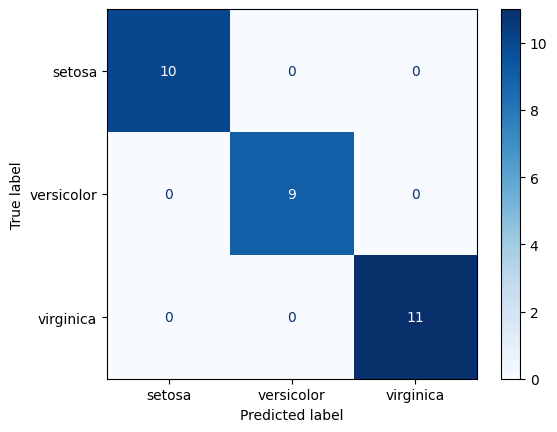

In [1106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.show()

Iris-setosa: The model correctly classified all 10 instances of this class.
Iris-versicolor: The model correctly classified all 9 instances of this class.
Iris-virginica: The model correctly classified all 11 instances of this class.

In conclusion, the confusion matrix demonstrates that the model has achieved excellent performance on the Iris dataset. It can accurately classify Iris species based on the given features.

In [1107]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for tuning
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 7]}

# Initialize GridSearchCV with RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)

# Fit grid search to training data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3, 'n_estimators': 50}


In [1108]:
# Predict on new data (e.g., a new Iris flower)
new_data = [[5.1, 3.5, 1.4, 0.2]]  # Sepal Length, Sepal Width, Petal Length, Petal Width
prediction = model.predict(new_data)
print("Predicted class:", iris.target_names[prediction])

Predicted class: ['setosa']


Overall, the Iris dataset is a valuable resource for learning and experimenting with various machine learning techniques. Its clear separation of classes and the importance of specific features make it a suitable benchmark for evaluating model performance.